# Actividad - Ecuaciones diferenciales

Kevin Emiliano Ayala Montoya 745973

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [2]:
def f1(t, x):
    return x / (t+1)

In [12]:
x0 = np.array([2])
t_span = [0, 10]
sol = solve_ivp(f1, t_span, x0, max_step = 0.01)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.99, 10.  , 10.  ])
 t_events: None
        y: array([[ 2.  ,  2.02,  2.04, ..., 21.98, 22.  , 22.  ]])
 y_events: None

Grafique con condición inicial $x_0 = 2$

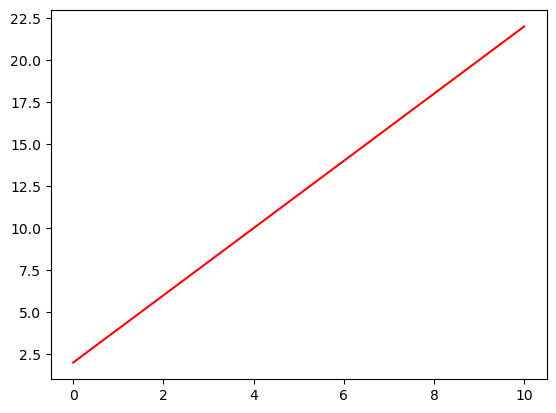

In [14]:
x0 = np.array([2])
plt.figure()
plt.plot(sol.t, sol.y[0], "r")

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

In [26]:
x0 = 0.5
v0 = 0.1
w0 = 3

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [25]:
def fun(t, X):
    x = X[0]
    dx = X[1]
    return np.array([dx, -w0**2*x])

In [38]:
tspan = [0, 10]
x0 = [0.5, 0.1]
sol_1 = solve_ivp(fun, tspan, x0, max_step = 0.01)
sol_1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.99, 10.  , 10.  ])
 t_events: None
        y: array([[0.5       , 0.50077487, 0.50109907, ..., 0.02919897, 0.04419134,
        0.04419134],
       [0.1       , 0.05496175, 0.00987404, ..., 1.50077539, 1.49747258,
        1.49747258]])
 y_events: None

Grafique

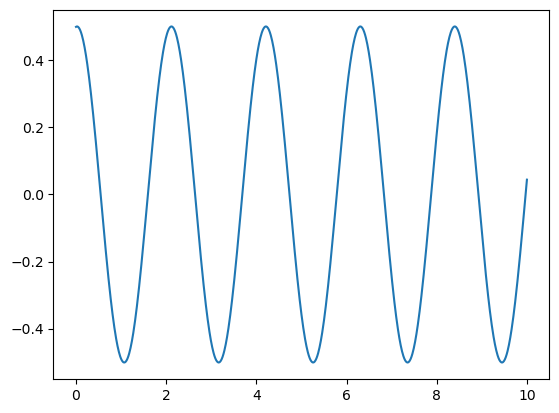

In [39]:
plt.figure()
plt.plot(sol_1.t, sol_1.y[0, :])

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [59]:
x0 = 0.5
v0 = 0.1
w0 = 3

In [64]:
def posicion(t, x0, v0, w0):
    A = x0
    B = v0/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

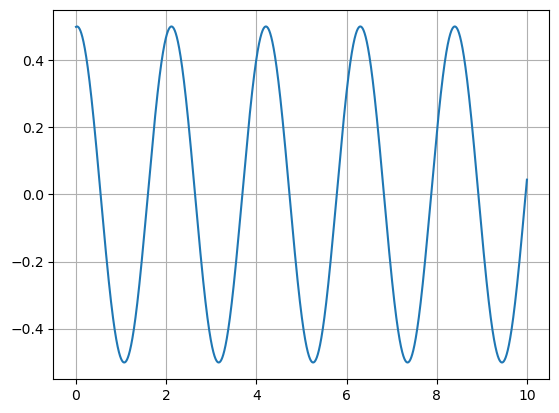

In [66]:
t = np.linspace(0, 10, 10000)
plt.figure()
plt.plot(t, posicion(t, x0, v0, w0))
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [76]:
def graficar(x0, v0, w0, t, m):
    tspan = [0, t]
    y0 = [x0, v0]
    sol_2 = solve_ivp(fun, tspan, y0, max_step = 0.01)
    
    tsim = np.linspace(0, t, m)
    
    plt.figure()
    plt.plot(tsim, posicion(tsim, x0, v0, w0), label = "Sol. Análitica", lw = 4)
    plt.plot(sol_2.t, sol_2.y[0, :], label = "Sol. Númerica")
    plt.legend()
    plt.grid()

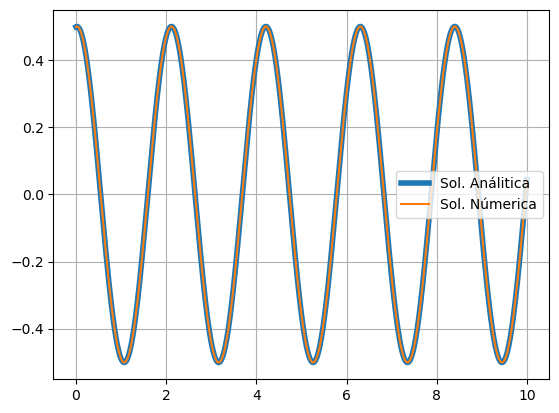

In [82]:
graficar(0.5, 0.1, 3, 10, 10000)